In [1]:
# url = 'https://kooplex-edu.elte.hu/notebook/ggqitd-dataexplvisu/report'

In [6]:
import requests, os
import numpy as np
import matplotlib.pyplot as plt

In [7]:
def get_query(endpoint="", fields={}):
    api_url = 'https://kooplex-edu.elte.hu/notebook/ggqitd-dataexplvisu/report/api/'
    if fields:
        query_str = "?" + "&".join([ "{}={}".format(k, fields[k]) for k in fields.keys()])
        
    kw = {
    'url': os.path.join(api_url, "%s"%(endpoint) + query_str),
    #'auth': (user, pwd),
    'headers': {"content-type": "application/x-www-form-urlencoded"},
    }

    return requests.get(**kw)

def post_query(endpoint="", fields={}):
    api_url = 'https://kooplex-edu.elte.hu/notebook/ggqitd-dataexplvisu/report/api/'
    if fields:
        query_str = "?" + "&".join([ "{}={}".format(k, fields[k]) for k in fields.keys()])
        
    kw = {
    'url': os.path.join(api_url, "%s"%(endpoint) + query_str),
    #'auth': (user, pwd),
    'headers': {"content-type": "application/x-www-form-urlencoded"},
    }

    return requests.post(**kw)

In [8]:
endpoint = "data"
fields = {"from":1920, "until":1930}
res = get_query(endpoint, fields)

In [9]:
res

<Response [200]>

In [10]:
res.json()

{'queryParams': {'from': '1920', 'until': '1930'},
 'data': [{'Entity': 'World', 'Year': 1920, 'CO_2_cc': 301.88},
  {'Entity': 'World', 'Year': 1923, 'CO_2_cc': 304.69},
  {'Entity': 'World', 'Year': 1925, 'CO_2_cc': 304.84},
  {'Entity': 'World', 'Year': 1928, 'CO_2_cc': 306.84},
  {'Entity': 'World', 'Year': 1929, 'CO_2_cc': 305.62}]}

In [11]:
res.json()['data']

[{'Entity': 'World', 'Year': 1920, 'CO_2_cc': 301.88},
 {'Entity': 'World', 'Year': 1923, 'CO_2_cc': 304.69},
 {'Entity': 'World', 'Year': 1925, 'CO_2_cc': 304.84},
 {'Entity': 'World', 'Year': 1928, 'CO_2_cc': 306.84},
 {'Entity': 'World', 'Year': 1929, 'CO_2_cc': 305.62}]

In [12]:
endpoint = "data"
fields = {"date":2016, "value":2.5}
res = post_query(endpoint, fields)
print(res)
print(res.text)

<Response [200]>
{"Message": "upload successful"}



In [13]:
endpoint = "data"
fields = {"from":2014, "until":2017}
res = get_query(endpoint, fields)
print(res.json()['data'])

[{'Entity': 'World', 'Year': 2014, 'CO_2_cc': 398.65}, {'Entity': 'World', 'Year': 2015, 'CO_2_cc': 400.83}, {'Entity': 'World', 'Year': 2016, 'CO_2_cc': 404.24}, {'Entity': 'World', 'Year': 2017, 'CO_2_cc': 406.55}, {'Entity': 'World', 'Year': 2016, 'CO_2_cc': 2.5}, {'Entity': 'World', 'Year': 2016, 'CO_2_cc': 2.5}, {'Entity': 'World', 'Year': 2016, 'CO_2_cc': 2.5}]


In [24]:
endpoint = "data"
fields = {"from":1900, "until":2010}
res = get_query(endpoint, fields)
print(res.json()['data'])

[{'Entity': 'World', 'Year': 1900, 'CO_2_cc': 294.22}, {'Entity': 'World', 'Year': 1902, 'CO_2_cc': 295.61}, {'Entity': 'World', 'Year': 1904, 'CO_2_cc': 295.99}, {'Entity': 'World', 'Year': 1905, 'CO_2_cc': 299.02}, {'Entity': 'World', 'Year': 1906, 'CO_2_cc': 298.48}, {'Entity': 'World', 'Year': 1909, 'CO_2_cc': 301.5}, {'Entity': 'World', 'Year': 1910, 'CO_2_cc': 297.87}, {'Entity': 'World', 'Year': 1911, 'CO_2_cc': 298.36}, {'Entity': 'World', 'Year': 1913, 'CO_2_cc': 301.3}, {'Entity': 'World', 'Year': 1914, 'CO_2_cc': 300.7}, {'Entity': 'World', 'Year': 1916, 'CO_2_cc': 301.92}, {'Entity': 'World', 'Year': 1918, 'CO_2_cc': 303.85}, {'Entity': 'World', 'Year': 1919, 'CO_2_cc': 304.61}, {'Entity': 'World', 'Year': 1920, 'CO_2_cc': 301.88}, {'Entity': 'World', 'Year': 1923, 'CO_2_cc': 304.69}, {'Entity': 'World', 'Year': 1925, 'CO_2_cc': 304.84}, {'Entity': 'World', 'Year': 1928, 'CO_2_cc': 306.84}, {'Entity': 'World', 'Year': 1929, 'CO_2_cc': 305.62}, {'Entity': 'World', 'Year': 19

In [25]:
year,co2_cc = [],[]

for row in res.json()['data']:
    year.append(row['Year'])
    co2_cc.append(row['CO_2_cc'])

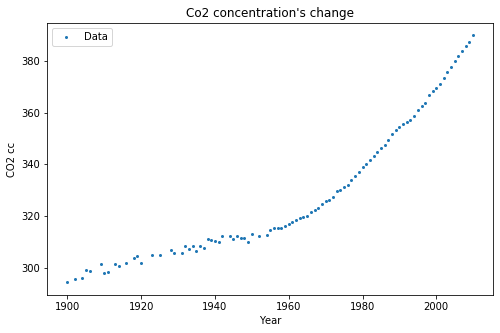

In [26]:
plt.figure(figsize=(8,5))
plt.plot(year,co2_cc,'.',ms=4,label='Data')
plt.title('Co2 concentration\'s change')
plt.xlabel('Year')
plt.ylabel('CO2 cc')
plt.legend()